In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from tqdm import tqdm
import tensorflow as tf

import os
import shutil
from tensorflow import keras
from tensorflow.keras.utils import Sequence
from tensorflow.keras import optimizers, layers
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD

import cv2 as cv
from sklearn.model_selection import train_test_split

In [ ]:
# Function to Extract features from the images
def image_feature(direc, new_ldseg):
    model = InceptionV3(weights='imagenet', include_top=False)
    features = [];
    img_name = [];
    for fn in tqdm(new_ldseg):
        fname=direc+fn
        img=image.load_img(fname,target_size=(224,224))
        x = img_to_array(img)
        x=np.expand_dims(x,axis=0)
        x=preprocess_input(x)
        feat=model.predict(x)
        feat=feat.flatten()
        features.append(feat)
        img_name.append(fn)
    return features,img_name

In [ ]:
def rename (ldseg, data):
  i = 0
  for filename in ldseg:
    dst =str(i) + '.png'
    src =data+ filename
    dst =data+ dst
    os.rename(src, dst)
    i += 1
  return i

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_path = '/content/drive/MyDrive/data'
#ldseg=np.array(os.listdir(img_path))
#number = rename(ldseg, img_path)

In [ ]:
new_ldseg=np.array(os.listdir(img_path))

img_features,img_name=image_feature(img_path, new_ldseg)
img_features
len(img_features[0])

In [ ]:
new_ldseg

In [ ]:
image_cluster = pd.DataFrame(img_name,columns=['image'])

In [ ]:
image_cluster

,image
0,cat.2.jpg
1,cat.300.jpg
2,cat.1.jpg
3,cat.5.jpg
4,cat.4.jpg
...,...
615,tiger.6.jpg
616,tiger.10.jpg
617,tiger.5.jpg
618,tiger.4.jpg


In [ ]:
import matplotlib.pyplot as plt
#Creating Clusters
k = 2
clusters = KMeans(k, random_state = 40)
clusters.fit_predict(img_features)


centroids = clusters.cluster_centers_
centroids


array([[0.27859111, 0.31625191, 0.26134685, ..., 0.4318194 , 0.78862238,
        1.09747381],
       [0.42509465, 0.45024004, 0.25241089, ..., 0.82834878, 1.03156644,
        0.60356577]])

In [ ]:
KMeans(n_clusters=2, random_state=40)

KMeans(n_clusters=2, random_state=40)

In [ ]:
image_distance = pd.DataFrame([])

for center in range(len(centroids)):
  distance = []
  for feature in range(len(img_features)):
    temp = centroids[center] - img_features[feature]
    distance += [np.linalg.norm(temp)]
  print(distance)
  image_distance["class"+str(center)] = distance

[227.99607021371148, 183.6968058779025, 166.40311174159606, 242.64173307063132, 226.10180742153827, 231.51301926892359, 191.54152950611712, 309.76400072975883, 202.6531965488748, 196.27692778227396, 250.6656778763323, 200.18966746436067, 221.115488309319, 196.6768986857733, 194.26842574166716, 189.47565371052647, 187.85681941531058, 237.49986500422042, 218.00572833938168, 178.89541196285722, 261.1344812727113, 181.00796374712752, 237.19608705015878, 220.09166643986842, 230.4727947955072, 190.53509194273406, 281.1951092401439, 295.3605921223117, 227.10628609802367, 166.61776583596415, 230.47555423279496, 180.99254584946385, 211.55011358768473, 212.68830060154113, 228.86565741482534, 224.4577054247313, 188.24601400872044, 187.8477130536206, 206.81289552638606, 286.19954064730763, 154.84351574806993, 225.30132753595151, 180.6115089252204, 181.33352121629594, 175.60990764220182, 172.62501611020562, 189.71735299098304, 241.60659132349394, 166.61177677768856, 185.71697938059305, 170.60575367

In [ ]:
image_distance

,class0,class1
0,227.996070,193.042180
1,183.696806,149.418699
2,166.403112,130.374709
3,242.641733,247.887578
4,226.101807,199.041842
...,...,...
615,166.150725,177.563264
616,164.372272,178.615290
617,168.029873,182.293580
618,164.136737,180.908388


In [ ]:
#print(image_distance["class0"])
min_distance = np.where(image_distance["class0"] <= image_distance["class1"], image_distance["class0"], image_distance["class1"])
print(min_distance)

[193.04218042 149.41869879 130.37470928 242.64173307 199.04184188
 204.47757802 166.24008527 309.76400073 176.22431627 155.58601314
 250.66567788 179.10166945 209.49330382 165.19148517 160.72296974
 158.50676774 152.82265515 198.24065023 174.89545607 153.17234319
 232.10787439 169.3814098  237.19608705 197.00890076 224.90393934
 172.63277175 281.19510924 295.36059212 190.70111113 143.40771815
 203.20559347 142.78175547 175.84684583 178.13500961 194.29796307
 219.79170331 149.42770284 153.50611161 176.92461458 283.96595213
 115.45078811 193.1839459  157.60046364 143.42601148 160.51556417
 151.44996405 158.56631781 241.60659132 141.00746418 176.74635641
 152.81041524 208.90547666 162.55553328 196.62113984 159.85716174
 151.65880477 145.45322003 165.87417    164.72607139 189.0956068
 217.70160636 206.20265078 146.36677791 203.75042384 159.37129837
 155.01803901 183.27782725 144.53642629 185.08547701 147.8343348
 265.26027254 217.298826   181.3030091  182.18921029 164.43941006
 224.2071421

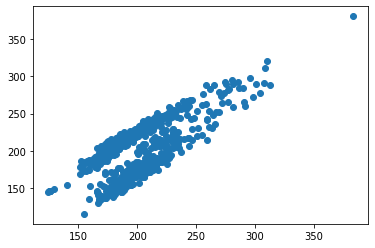

In [ ]:

plt.scatter(image_distance["class0"], image_distance["class1"])
#plt.xlim(100, 400)
#plt.ylim(100, 400)
#for i, txt in enumerate(image_cluster["image"]):
    #plt.annotate(txt, (image_distance["class0"], image_distance["class1"]))

In [ ]:
image_cluster["actualid"] = 1
image_cluster.loc[300:599,"actualid"] = 0
image_cluster.loc[600:609,"actualid"] = 2
image_cluster.loc[610:619,"actualid"] = 3
image_cluster["clusterid"] = clusters.labels_ # To mention which image belong to which cluster
#image_cluster["0"] = image_distance["0"]
#image_cluster["1"] = image_distance["1"]
#image_cluster["2"] = image_distance["2"]
image_cluster

,image,actualid,clusterid
0,cat.2.jpg,1,1
1,cat.300.jpg,1,1
2,cat.1.jpg,1,1
3,cat.5.jpg,1,0
4,cat.4.jpg,1,1
...,...,...,...
615,tiger.6.jpg,3,0
616,tiger.10.jpg,3,0
617,tiger.5.jpg,3,0
618,tiger.4.jpg,3,0


           image  actualid  clusterid   mismatchid      class0      class1
3      cat.5.jpg         1          0    cat.5.jpg  242.641733  247.887578
7      cat.6.jpg         1          0    cat.6.jpg  309.764001  319.768187
10    cat.19.jpg         1          0   cat.19.jpg  250.665678  252.804890
22    cat.23.jpg         1          0   cat.23.jpg  237.196087  255.857603
26    cat.26.jpg         1          0   cat.26.jpg  281.195109  289.669370
27    cat.24.jpg         1          0   cat.24.jpg  295.360592  297.503658
47    cat.44.jpg         1          0   cat.44.jpg  241.606591  256.336268
61    cat.65.jpg         1          0   cat.65.jpg  206.202651  209.447002
79    cat.80.jpg         1          0   cat.80.jpg  204.908331  209.835141
82    cat.85.jpg         1          0   cat.85.jpg  308.636426  311.012447
86    cat.88.jpg         1          0   cat.88.jpg  236.559696  244.289808
104  cat.114.jpg         1          0  cat.114.jpg  276.655996  281.657796
116  cat.108.jpg         

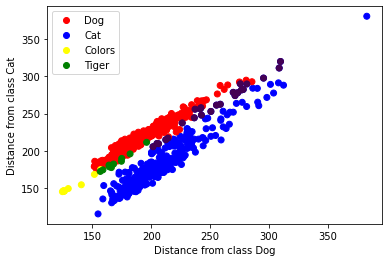

In [ ]:
import matplotlib
#image_cluster # 0 denotes cat and 1 denotes dog
colors =['red','blue','yellow','green']
label = ['Dog', 'Cat', 'Colors', 'Tiger', 'Mismatch']

plt.xlabel("Distance from class Dog")
plt.ylabel("Distance from class Cat")
scatter = plt.scatter(image_distance["class0"], image_distance["class1"], c=image_cluster["actualid"], cmap=matplotlib.colors.ListedColormap(colors))
plt.legend(handles=scatter.legend_elements()[0], labels=label)
#print(pd.idxmax(image_distance["class0"]), pd.idxmax(image_distance["class1"]))
#image_distance["class0"].idxmax()
#image_distance["class1"].idxmax()
#print(image_cluster.loc[173,"image"])

mismatch_labels = np.where(image_cluster["clusterid"] != image_cluster["actualid"], image_cluster["image"], 0)
#print(mismatch_labels)

image_cluster["mismatchid"] = mismatch_labels
image_cluster["class0"] = image_distance["class0"]
image_cluster["class1"] = image_distance["class1"]
image_cluster

df_new = image_cluster[image_cluster["mismatchid"] != 0]
#print(df_new)
mismatch_images = df_new.head(24)
print(mismatch_images)

plt.scatter(mismatch_images["class0"], mismatch_images["class1"], c=mismatch_images["actualid"])

In [ ]:
act_id = image_cluster.loc[0:599,"actualid"].values
clu_id = image_cluster.loc[0:599,"clusterid"].values
print(act_id)
print(clu_id)
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(act_id, clu_id)

print("Confusion Matrix", cf_matrix)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

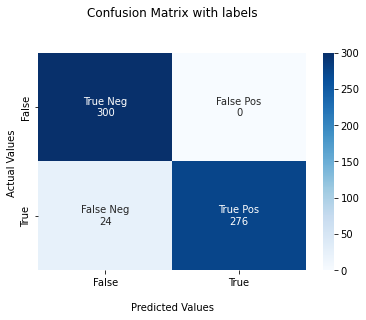

In [ ]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#image_cluster["clusterid" == 0] # There are only 321 images in cats which means rest 29 images of cats are misclassified in dogs cluster

# Get the count of Zeros in column image_cluster
count = (image_cluster['clusterid'] == 0).sum()
print('Count of zeros in Column image_cluster for dogs: ', count)

count = (image_cluster['clusterid'] == 1).sum()
print('Count of ones in Column image_cluster for cats: ', count)

Count of zeros in Column image_cluster for dogs:  344
Count of ones in Column image_cluster for cats:  276


In [ ]:
# Made folder to seperate images
os.mkdir('cats')
os.mkdir('dogs')

In [ ]:
# Images will be seperated according to cluster they belong
for i in range(len(image_cluster)):
    if image_cluster['clusterid'][i]==0:
        shutil.copy(os.path.join(img_path, image_cluster['image'][i]), 'cats')
    elif image_cluster['clusterid'][i]==1:
        shutil.copy(os.path.join(img_path, image_cluster['image'][i]), 'dogs')
    else:
        shutil.copy(os.path.join(img_path, image_cluster['image'][i]), 'anon')